# Bank Customer Acquisition Analysis

# Bank Marketing Dataset

<img src = "01.jpg" width = 6000 height = 600 />

## Introduction :

A Portuguese bank had conducted a telemarketing campaign for a term deposit product somewhere around late 2010. A term deposit is very similar to a fixed deposit, where we deposit money for a fixed period of time.

Through the campaign, the bank had collected data about the prospects' demographics, other financial products they have purchased in the past (loans, deposits, etc.), the number of times they were called, etc. They also recorded the response data, i.e., whether the person had subscribed to the term deposit product, which is the target variable.

The bank's marketing team wants to launch yet another telemarketing campaign for the same product. As an analyst at the bank, we want to answer the following questions using the past data:

   1. Which prospects are more likely to buy the product (i.e., to respond )?
   2. Which attributes determine the propensity to buy a term deposit?
   3. Once we predict the likelihood of response, how many prospects should we target for telemarketing?
   4. By how much can we reduce the marketing cost using the model, and how many prospects will we acquire?

## Term deposit :

### What is Term Deposit?

Term deposit is deposit account where money is locked up for some period of time, which ranges from few months to years. However, as a tradeoff to money being locked up, term deposit offers higher interest rate than traditional, liquid savings accounts. Early termination (withdrawl of money) is often associated with penalties.

It is also known as certificate of deposit in the United States.

You can read more about term deposit if you are interested:

* Investopedia article: https://www.investopedia.com/terms/t/termdeposit.asp
* Wikipedia article: https://en.wikipedia.org/wiki/Time_deposit#:~:text=A%20time%20deposit%20or%20term,to%20as%20its%20%E2%80%9Cterm%E2%80%9D.


## Assessing marketing campaigns :

### Conversion and Retention

Most widely used metrics to measure the success of a marketing campaigns are conversion rate and retention rate.

Conversion rate answers the question, "Are we good at making new customers (or subscribers in this case)?" by calculating the propportion of prospects (of a marketing campaign) that became a customer. Retention rate answers the question, "Are we good at keeping our current customers?", by calculating the proportion of existing customers (of a marketing campaign) that has stayed as customers after a given time.

For the context of analyzing this dataset, we will be observing the conversion rate across clients with differnt attributes, and retention rate is not relevant to the analysis. However, it is a good concept to be aware of.

### Segmentation

Segementation is a process of separating your audience into groups based on shared attribute(s), and marketing campaigns utilize them to make their messages resonate more with their target audience. Let's say you are running a marketing agency and that sent an email campaign for advertising life insurance policies. Would you expect the same or different levels of response from people in their 20s and 60s? Answer is most likely the latter.

Attributes used to segment audience or customers vary widely. They may include demographic information like age and gender and/or lifestyle traits and even past behaviors. For companies, segmentation also help companies to have deeper understanding of their audience or determine the most effective channel of communication.

This also means that effectiveness of any marketing campaigns should be evaluated separately on segment of audience/customer rather than calcaulting a single conversion rate or retention rate for the campaign.

I have listed additional articles below if you are interested this topic.

* HubSpot Article: https://blog.hubspot.com/marketing/segmentation-targeting-positioning
* Wikipedia: https://en.wikipedia.org/wiki/Market_segmentation

## Problem and Business Objective :

* To reduce customer acquisition cost by targeting the ones who are likely to buy
* To improve the response rate, i.e., the fraction of prospects who respond to the campaign

## Bank Marketing :

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

The classification goal is to predict if the client will subscribe a term deposit (variable y).



## Description of Dataset :

**Customer data:** Demographic data, data about other financial products like home loans, personal loans, etc. 

**Campaign data:** Data about previous campaigns (number of previous calls, number of days since the last call was made, etc.) Macroeconomic data 

**Target variable:** Response (Yes/No)



#### Input variables :

    Bank client data:

**1. Age** : (numeric)

**2. Job** : type of job (categorical: “admin.”, “unknown”, “unemployed”, “management”, “housemaid”, “entrepreneur”, “student”, “blue-collar”, “self-employed”, “retired”, “technician”, “services”)

**3. Marital** : marital status (categorical: “married”,“divorced”,“single”; note: “divorced” means divorced or widowed)

**4. Education** : (categorical: “unknown”,“secondary”,“primary”,“tertiary”)

**5. Default** : has credit in default? (binary: “yes”,“no”)

**6. Balance** : average yearly balance, in euros (numeric)

**7. Housing** : has housing loan? (binary: “yes”,“no”)

**8. Loan** : has personal loan? (binary: “yes”,“no”)


#### related with the last contact of the current campaign :

**9. Contact** : contact communication type (categorical: “unknown”,“telephone”,“cellular”)

**10. Day** : last contact day of the month (numeric)

**11. Month** : last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)

**12. Duration** : last contact duration, in seconds (numeric)


#### other attributes :

**13. Campaign** : number of contacts performed during this campaign and for this client (numeric, includes last contact)

**14. Pdays** : number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

**15. Previous** : number of contacts performed before this campaign and for this client (numeric)

**16. Poutcome** : outcome of the previous marketing campaign (categorical: “unknown”,“other”,“failure”,“success”)


#### output variable (desired target) :

**17. y** : has the client subscribed a term deposit? (binary: “yes”,“no”)

## Dataset Source :

    https://www.kaggle.com/janiobachmann/bank-marketing-dataset
    
    https://archive.ics.uci.edu/ml/datasets/bank+marketing

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
data = pd.read_csv("bank.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.shape

(11162, 17)

## Summary of Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,11162.0,NaN,NaN,NaN,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
job,11162,12,management,2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,11162,3,married,6351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,11162,4,secondary,5476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,11162,2,no,10994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,11162.0,NaN,NaN,NaN,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
housing,11162,2,no,5881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,11162,2,no,9702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,11162,3,cellular,8042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,11162.0,NaN,NaN,NaN,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0


* Dropping the duraction because when an executive picks up the phone and calls a prospective client, he/she is unsure of the duration of the call.

## Total Missing values

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* We can see there is no missing values in any column.

## Exploratory Data Analysis

### Data Visualization

### Univariate Analysis

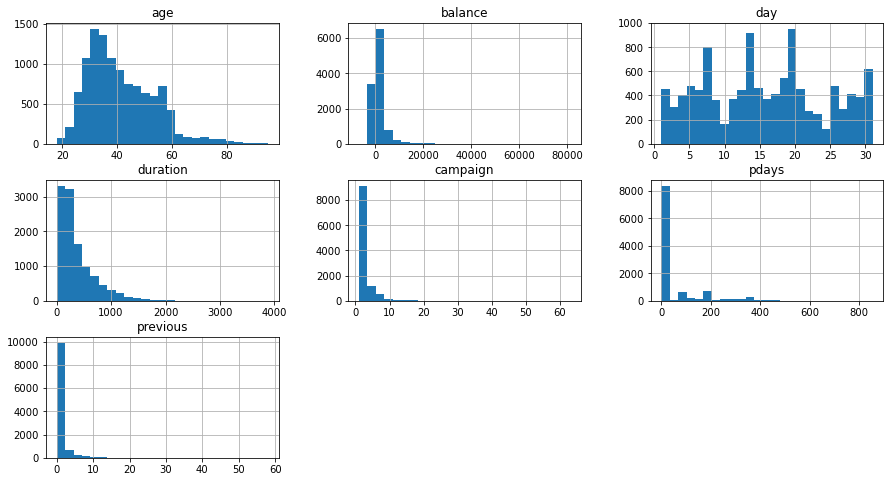

In [8]:
data.hist(bins = 25, figsize = (15,8))
plt.show()

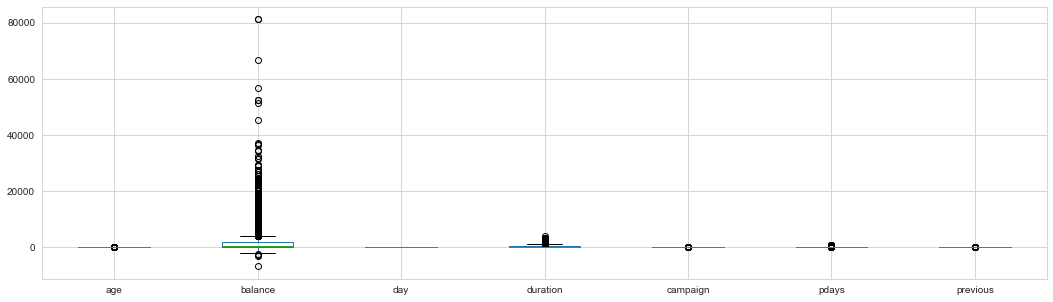

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,5))
data.boxplot()
plt.show()

### Age

Text(0.5, 0, 'age')

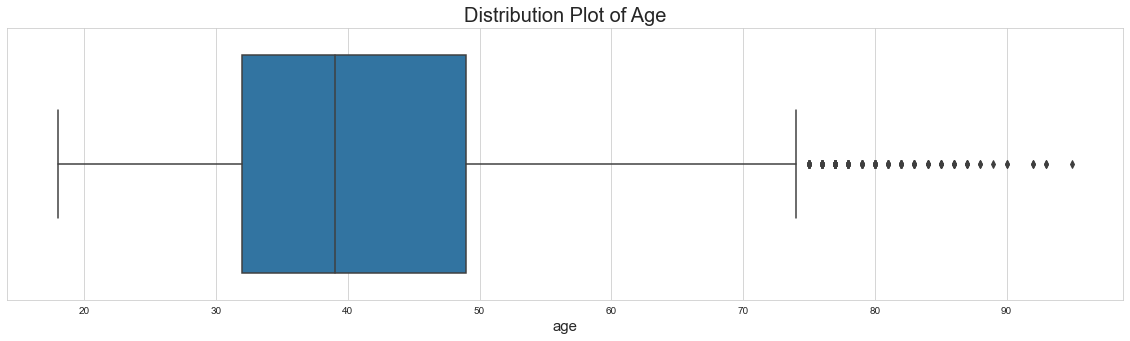

In [10]:
plt.figure(figsize = (20,5))
sns.boxplot(data['age'])
plt.title('Distribution Plot of Age', fontsize = 20)
plt.xlabel('age', fontsize = 15)

* there are many outliers.

### 2. Job

<AxesSubplot:xlabel='job', ylabel='count'>

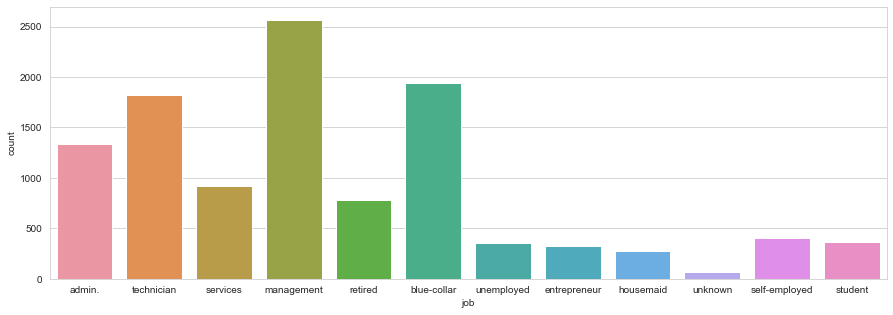

In [11]:
plt.figure(figsize = (15, 5))
sns.countplot(data['job'])

### 3. marital

<AxesSubplot:xlabel='marital', ylabel='count'>

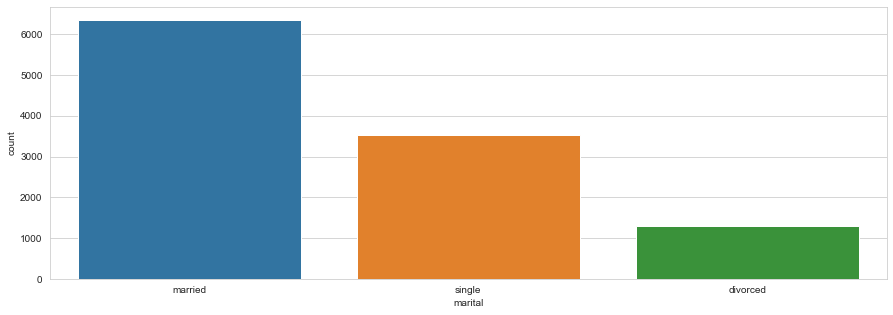

In [12]:
plt.figure(figsize = (15, 5))
sns.countplot(data['marital'])

<AxesSubplot:xlabel='education', ylabel='count'>

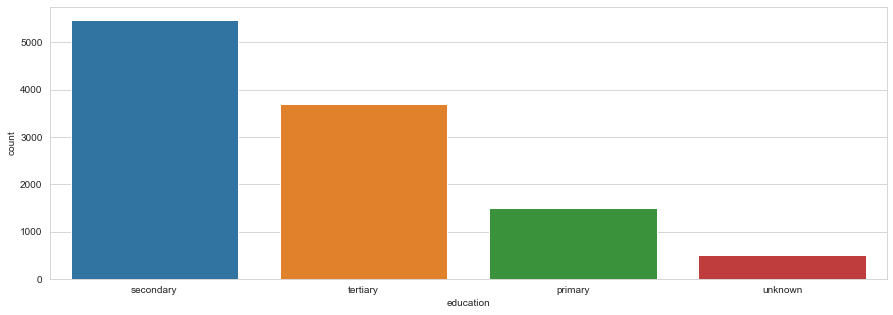

In [13]:
plt.figure(figsize = (15, 5))
sns.countplot(data['education'])

<AxesSubplot:xlabel='default', ylabel='count'>

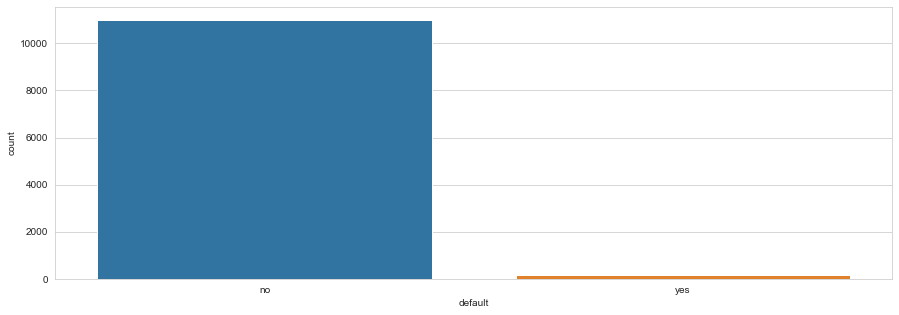

In [14]:
plt.figure(figsize = (15, 5))
sns.countplot(data['default'])

<AxesSubplot:xlabel='housing', ylabel='count'>

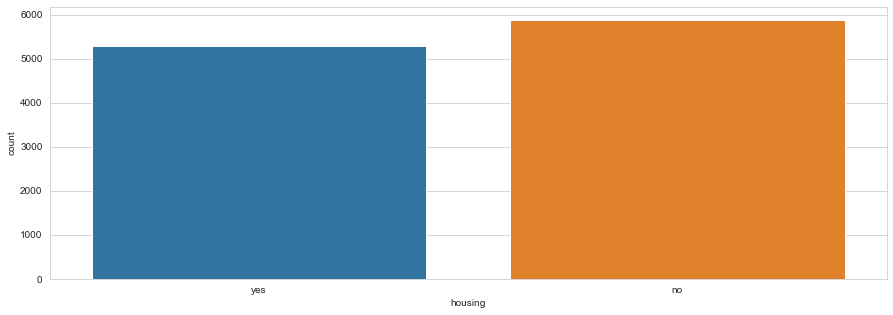

In [15]:
plt.figure(figsize = (15, 5))
sns.countplot(data['housing'])

<AxesSubplot:xlabel='loan', ylabel='count'>

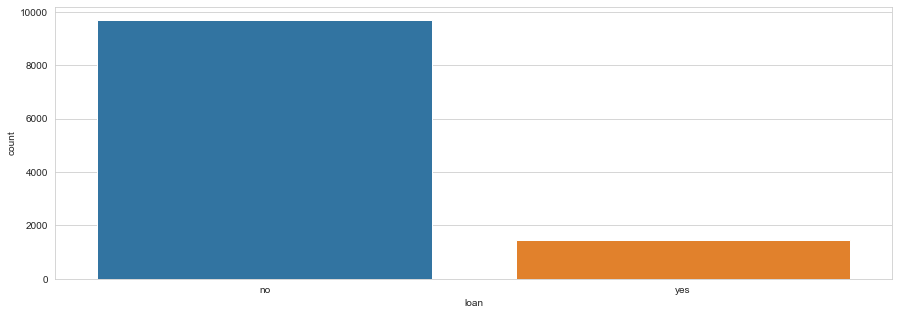

In [16]:
plt.figure(figsize = (15, 5))
sns.countplot(data['loan'])

<AxesSubplot:xlabel='contact', ylabel='count'>

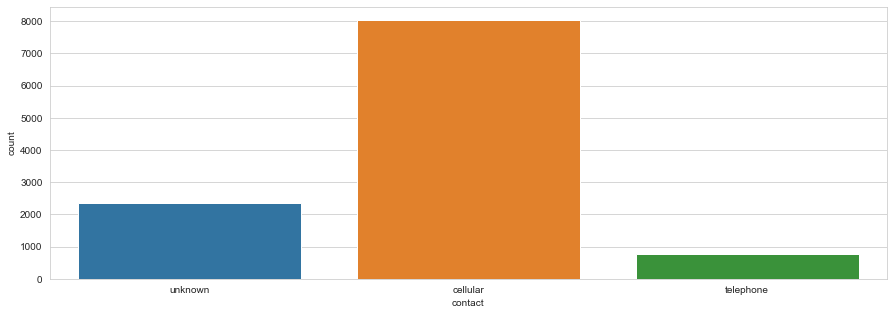

In [17]:
plt.figure(figsize = (15, 5))
sns.countplot(data['contact'])

<AxesSubplot:xlabel='month', ylabel='count'>

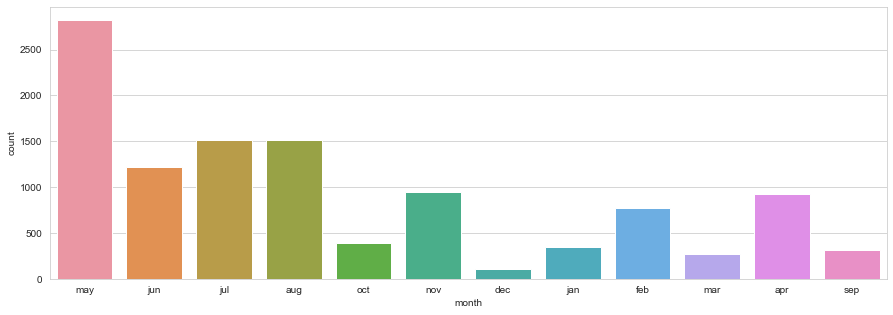

In [18]:
plt.figure(figsize = (15, 5))
sns.countplot(data['month'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

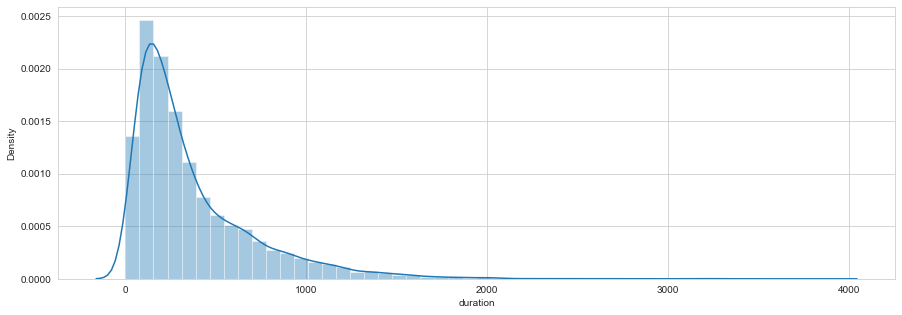

In [19]:
plt.figure(figsize = (15, 5))
sns.distplot(data['duration'])

<AxesSubplot:xlabel='campaign', ylabel='Density'>

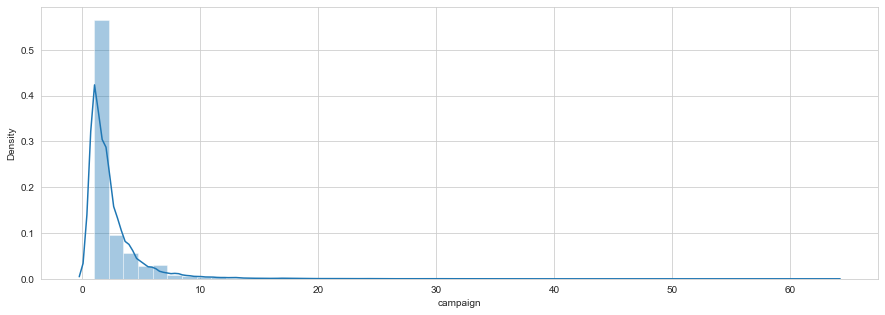

In [20]:
plt.figure(figsize = (15, 5))
sns.distplot(data['campaign'])

<AxesSubplot:xlabel='pdays', ylabel='Density'>

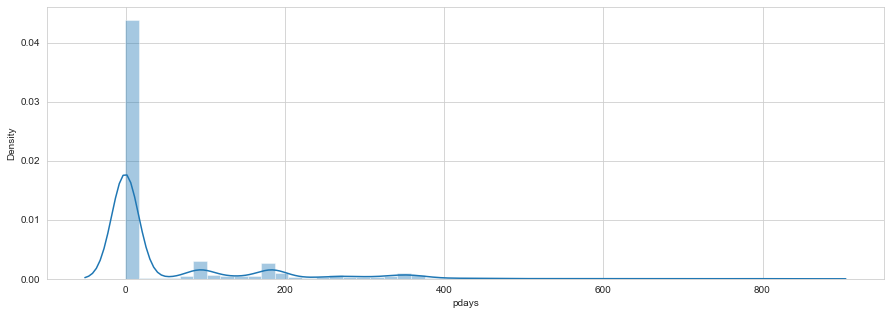

In [21]:
plt.figure(figsize = (15, 5))
sns.distplot(data['pdays'])

<AxesSubplot:xlabel='previous', ylabel='Density'>

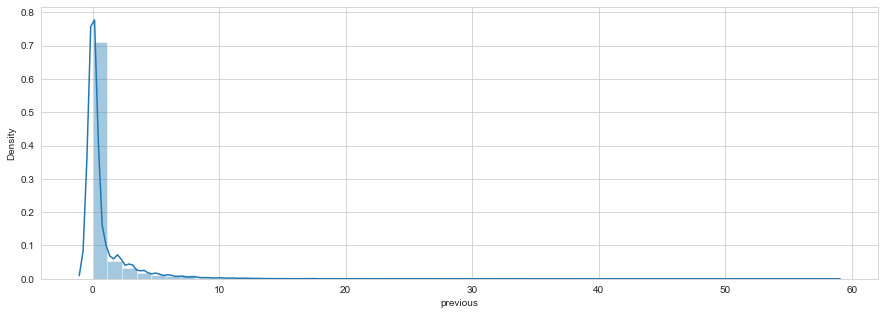

In [22]:
plt.figure(figsize = (15, 5))
sns.distplot(data['previous'])

<AxesSubplot:xlabel='poutcome', ylabel='count'>

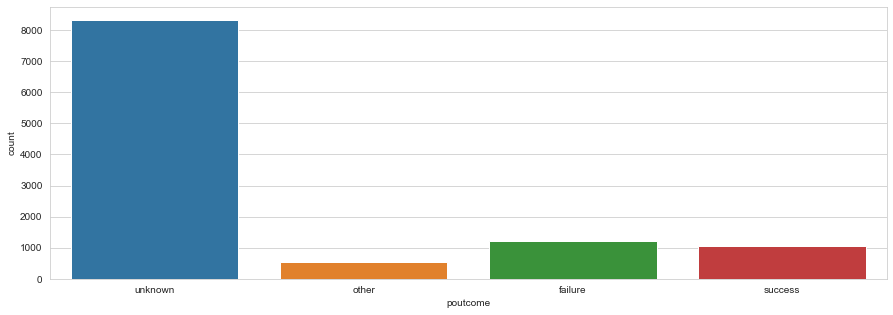

In [23]:
plt.figure(figsize = (15, 5))
sns.countplot(data['poutcome'])

<AxesSubplot:xlabel='deposit', ylabel='count'>

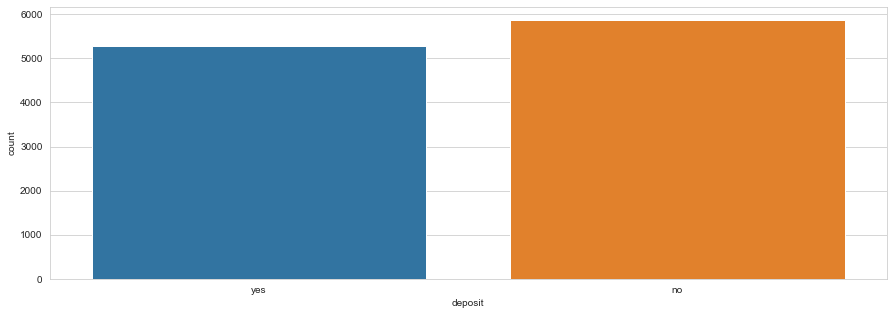

In [24]:
plt.figure(figsize = (15, 5))
sns.countplot(data['deposit'])

* Dataset is well balanced

### Bivariate Analysis

### 1. Balance vs Deposits of Customers

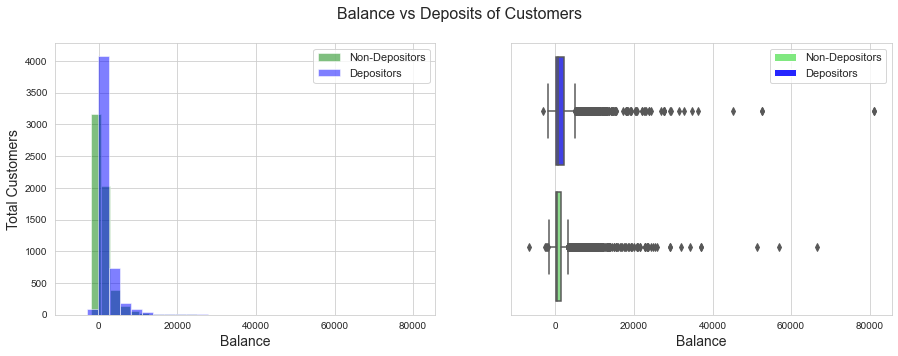

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle("Balance vs Deposits of Customers", size = 16)

# Subplot 1
ax[0].hist(data[data["deposit"] == 'no']["balance"],  bins = 30, alpha = 0.5, color = "green", label = "Non-Depositors")
ax[0].hist(data[data["deposit"] == 'yes']["balance"], bins = 30, alpha = 0.5, color = "blue",  label = "Depositors")

ax[0].set_xlabel("Balance", fontsize = 14)
ax[0].set_ylabel("Total Customers", fontsize = 14)
ax[0].legend(fontsize = 11);

# Subplot 2
sns.boxplot(x = "balance", y = "deposit", data = data, orient = "h", palette = { 'no':"#80e880", 'yes':"#2626ff"}, ax = ax[1])
ax[1].get_yaxis().set_visible(False)
ax[1].set_xlabel('Balance', fontsize = 14)

color_patches = [
    Patch(facecolor = "#80e880", label = "Non-Depositors"),
    Patch(facecolor = "#2626ff", label = "Depositors")
]
ax[1].legend(handles = color_patches, fontsize = 11);

* Most of the customers of bank have smaller balance.

* Customers with all range of balance make deposits.

* But, most of the deposits are received from customers with balance in range of (0, 1250).

### 2. Age vs Deposits of Customers

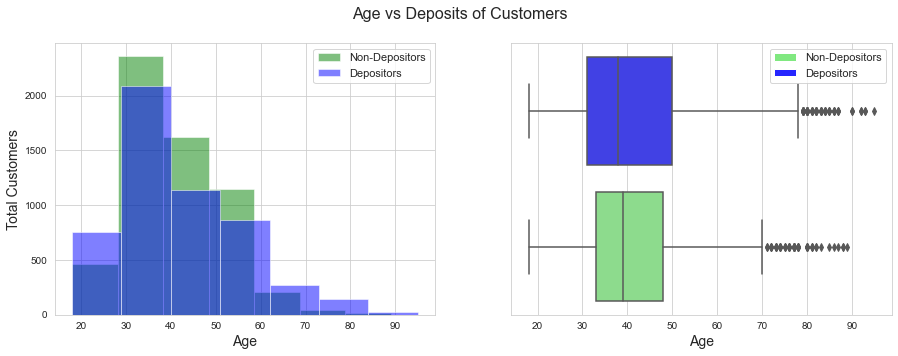

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
fig.suptitle("Age vs Deposits of Customers", size = 16)

# Subplot 1
ax[0].hist(data[data["deposit"] == 'no']["age"],  bins = 7, alpha = 0.5, color = "green", label = "Non-Depositors")
ax[0].hist(data[data["deposit"] == 'yes']["age"], bins = 7, alpha = 0.5, color = "blue",  label = "Depositors")

ax[0].set_xlabel("Age", fontsize = 14)
ax[0].set_ylabel("Total Customers", fontsize = 14)
ax[0].legend(fontsize = 11);

# Subplot 2
sns.boxplot(x = "age", y = "deposit", data = data, orient = "h", palette = { 'no':"#80e880", 'yes':"#2626ff"}, ax = ax[1])
ax[1].get_yaxis().set_visible(False)
ax[1].set_xlabel('Age', fontsize = 14)

color_patches = [
    Patch(facecolor = "#80e880", label = "Non-Depositors"),
    Patch(facecolor = "#2626ff", label = "Depositors")
]
ax[1].legend(handles = color_patches, fontsize = 11);

* Customers of all age groups make deposits.

* Most of the customers are in the age group of (25, 55) years. A larger part of them are non-depositors.

* Most of the customers above 60 years make deposits.

* Most of the customers below 25 years make deposits.

### 3. Job vs Deposit of Customers

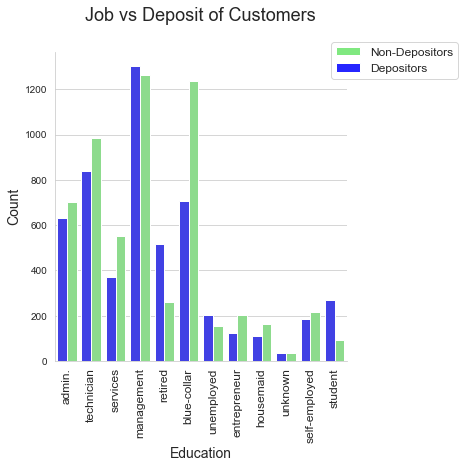

In [27]:
fig, ax = plt.subplots()

sns.catplot("job", hue = 'deposit', data = data, kind = "count", palette = {'no':"#80e880", 'yes':"#2626ff"}, legend = False)

color_patches = [
    Patch(facecolor = "#80e880", label = "Non-Depositors"),
    Patch(facecolor = "#2626ff", label = "Depositors")
]

plt.title("Job vs Deposit of Customers", size = 18, y = 1.08) 
plt.xlabel("Education", size = 14)
plt.ylabel("Count", size = 14)
plt.xticks(size = 12, rotation = 'vertical')
plt.legend(handles = color_patches, fontsize = 12,  bbox_to_anchor = (1.4,1.05))

plt.close(1)

* Customers from managment, retired, unemployed and student jobtypes prefer to deposit.

* Customers in services and blue-collar jobs deposit considerably less.

### 4. Marital vs Deposit of Customers

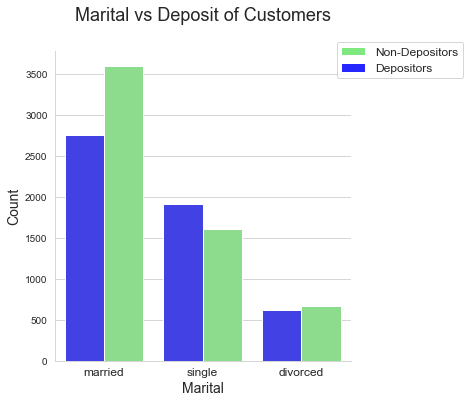

In [28]:
fig, ax = plt.subplots()

sns.catplot("marital", hue = 'deposit', data = data, kind = "count", palette = {'no':"#80e880", 'yes':"#2626ff"}, 
            legend = False)

color_patches = [
    Patch(facecolor = "#80e880", label = "Non-Depositors"),
    Patch(facecolor = "#2626ff", label = "Depositors")
]

plt.title("Marital vs Deposit of Customers", size = 18, y = 1.08) 
plt.xlabel("Marital", size = 14)
plt.ylabel("Count", size = 14)
plt.xticks(size = 12)
plt.legend(handles = color_patches, fontsize = 12,  bbox_to_anchor = (1.4,1.05))

plt.close(1) 

* Fewer married customers prefer to deposit.
* Larger single customers prefer to deposit.

### 5. Education vs Deposit of Customers

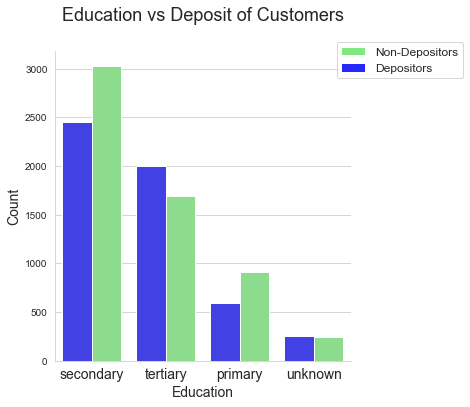

In [29]:
fig, ax = plt.subplots(figsize = (15,5))

sns.catplot("education", hue = 'deposit', data = data, kind = "count", palette = {'no':"#80e880", 'yes':"#2626ff"}, 
            legend = False)

color_patches = [
    Patch(facecolor = "#80e880", label = "Non-Depositors"),
    Patch(facecolor = "#2626ff", label = "Depositors")
]

plt.title("Education vs Deposit of Customers", size = 18, y = 1.08) 
plt.xlabel("Education", size = 14)
plt.ylabel("Count", size = 14)
plt.xticks(size = 14)
plt.legend(handles = color_patches, fontsize = 12,  bbox_to_anchor = (1.4,1.05))

plt.close(1) 

* Tertiary educated customers prefer to deposit.
* Customers with other education type deposit less.

## One hot encoding

In [30]:
col_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'deposit', 'contact']

for col in col_list:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


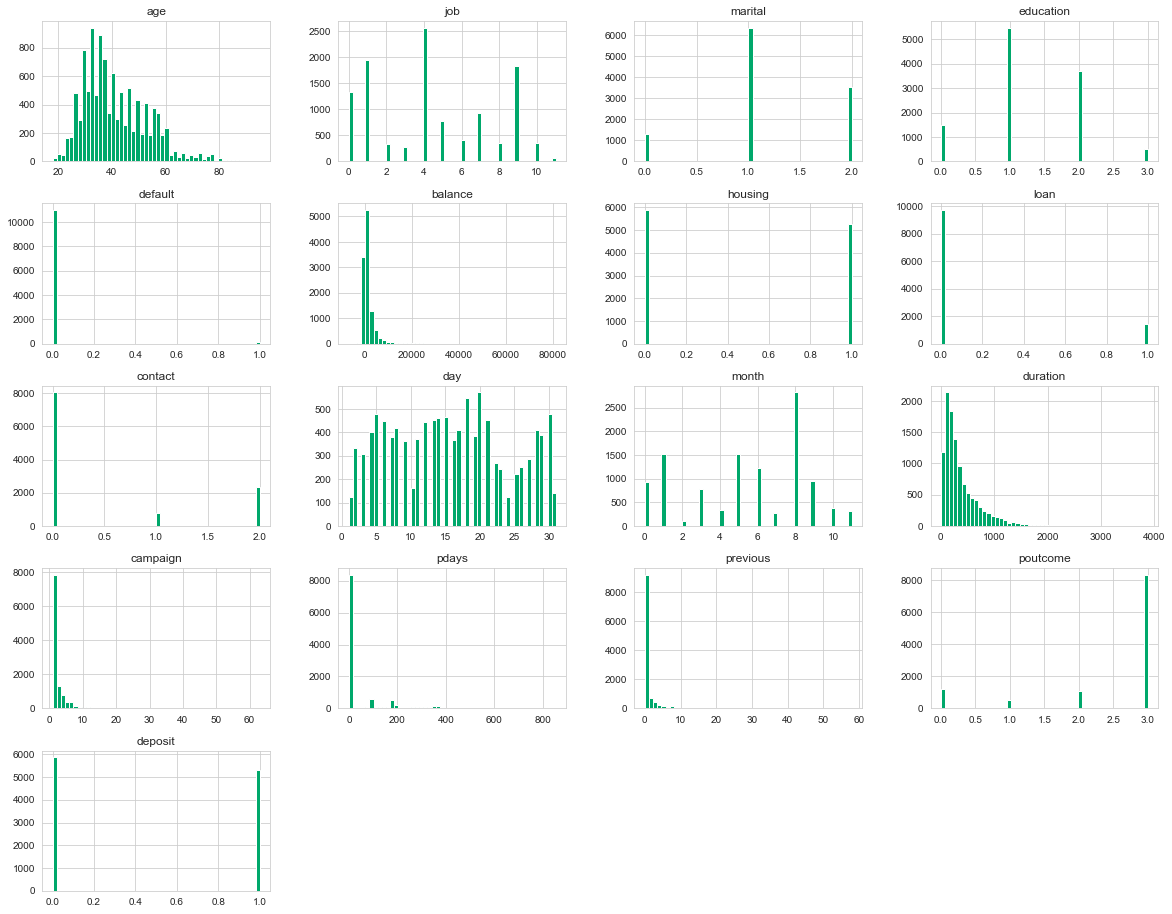

In [31]:
data.hist(bins = 50, figsize = (20,16), color = '#00A86B') 
plt.show()

## Removing Outliers

***Grubbs Function for Outlier Detection***

In [32]:
import scipy
import scipy.stats as stats

def outlier_cols(x): 
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    return col if (g_critical) < g_calculated else 0

In [33]:
cols_with_outliers = []
for col in data.columns:
    outlier_col = outlier_cols(data[col])
    cols_with_outliers.append(outlier_col)

while (cols_with_outliers.count(0)):
    cols_with_outliers.remove(0)
print('Columns with outliers are: {}'.format(cols_with_outliers) )

Columns with outliers are: ['default', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [34]:
for col in cols_with_outliers:
  if col != 'pdays' and col != 'balance':    # pdays and balance have negative values, so scaling will result in NaNs
    data[col] = (data[col]**(1/3.7))

In [35]:
any_outlier_col = []
for col in cols_with_outliers:
    outlier_col = outlier_cols(data[col])
    any_outlier_col.append(outlier_col)

while (any_outlier_col.count(0)): 
    any_outlier_col.remove(0)
any_outlier_col

['default', 'balance', 'campaign', 'pdays', 'previous']

***Grubbs Function Function for Validating Outlier Removal***

In [36]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")

In [37]:
for col in any_outlier_col:
  if col != 'pdays' and col != 'balance':
    data[col] = (data[col]**(3.7))  

In [38]:
cut_off = 11000
for i in data['balance']:
    if i >= cut_off:
        data['balance'] = data['balance'].replace(i, cut_off)

grubbs_test(data['balance'])

Grubbs Calculated Value: 4.377039763193229
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



In [39]:
cut_off = 12
for i in data['campaign']:
    if i >= cut_off:
        data['campaign'] = data['campaign'].replace(i, cut_off)

grubbs_test(data['campaign'])

Grubbs Calculated Value: 4.523836877301487
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



In [40]:
cut_off = 8
for i in data['previous']:
    if i >= cut_off:
        data['previous'] = data['previous'].replace(i, cut_off)

grubbs_test(data['previous'])

Grubbs Calculated Value: 4.3237475387753905
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



In [41]:
cut_off = 500
for i in data['pdays']:
    if i >= cut_off:
        data['pdays'] = data['pdays'].replace(i, cut_off)

grubbs_test(data['pdays'])

Grubbs Calculated Value: 4.278614474702936
Grubbs Critical Value: 4.585737088805695
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outlier



## Correlation
### Heatmap

<AxesSubplot:title={'center':'Correlation of all the Columns'}>

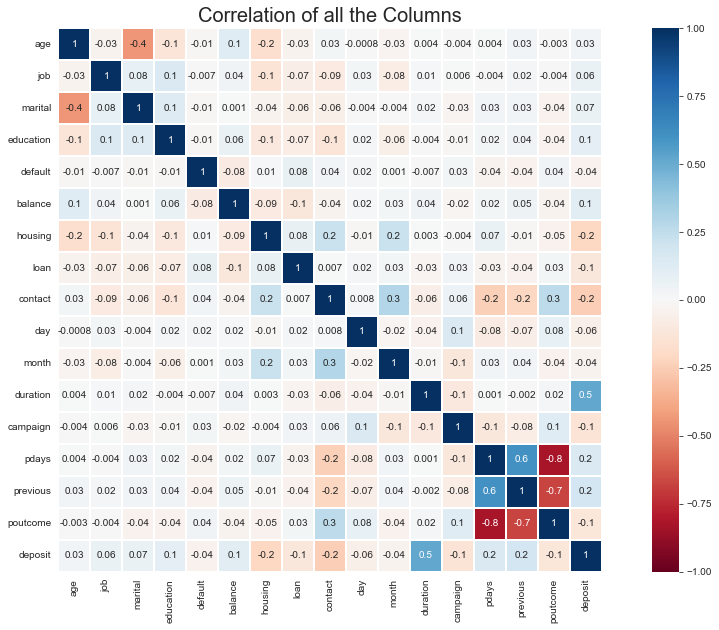

In [42]:
plt.figure(figsize = (18,10))
plt.title('Correlation of all the Columns', fontsize = 20)
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, center = 0, fmt = '.1g', linewidths = 1, linecolor = 'white', 
            square = True, cmap ='RdBu')

## Adding New Features

In [43]:
data['dur_pdays'] = ((data['duration'] + data['previous']**0.15 - (data['contact']**2)**0.0003 )**2)**0.25


data['contact_housing'] = (data['housing'])**(0.2) + (data['campaign'])**(0.35)  + data['contact']**(0.2)

In [44]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,dur_pdays,contact_housing
0,59,0,1,1,0.0,2343,1,0,2,5,8,6.540936,1.0,-1,0.0,3,1,2.353831,3.148698
1,56,0,1,1,0.0,45,0,0,2,5,8,7.174505,1.0,-1,0.0,3,1,2.484771,2.148698
2,41,9,1,1,0.0,1270,1,0,2,5,8,7.069342,1.0,-1,0.0,3,1,2.463519,3.148698
3,55,7,1,1,0.0,2476,1,0,2,5,8,5.580458,1.0,-1,0.0,3,1,2.140103,3.148698
4,54,0,1,2,0.0,184,0,0,2,5,8,5.812037,2.0,-1,0.0,3,1,2.193541,2.423259


## Pre - Processing Data

In [45]:
X = data.drop(columns = ['deposit'])
y = data['deposit']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7813, 18)
(7813,)
(3349, 18)
(3349,)


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [50]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 0.8007167541277358
Testing accuracy  : 0.7963571215288145


### Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred_dtc_train = dtc.predict(x_train)
y_pred_dtc_test  = dtc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_dtc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_dtc_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.772767990444909


### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test  = rfc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_rfc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_rfc_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.8381606449686474


### SVC

In [55]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [56]:
y_pred_svm_train = svm.predict(x_train)
y_pred_svm_test  = svm.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_svm_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_svm_test, y_test))

Training accuracy : 0.834506591578139
Testing accuracy  : 0.8124813377127501


### Linear SVC

In [57]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(x_train, y_train)

LinearSVC()

In [58]:
y_pred_svm_train = svm.predict(x_train)
y_pred_svm_test  = svm.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_svm_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_svm_test, y_test))

Training accuracy : 0.8023806476385511
Testing accuracy  : 0.8002388772767991


### K-Nearest Neighbors

In [59]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,21):
        neigh = KNeighborsClassifier(n_neighbors = i)

In [60]:
neigh.fit(x_train, y_train)

y_pred_knn_train = neigh.predict(x_train)
y_pred_knn_test  = neigh.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_knn_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_knn_test, y_test))

Train Accuracy :  0.7824139255087674
Test Accuracy  :  0.7581367572409674


### XGB Classifier

In [61]:
from xgboost import XGBClassifier
gbm = XGBClassifier()
gbm.fit(x_train, y_train)

[16:02:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred_xgb_train = gbm.predict(x_train)
y_pred_xgb_test  = gbm.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_xgb_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_xgb_test, y_test))

Train Accuracy :  0.9695379495712274
Test Accuracy  :  0.8393550313526426


### Ada Boost Classifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier()
model3.fit(x_train, y_train)

AdaBoostClassifier()

In [64]:
y_pred_abc_train = model3.predict(x_train)
y_pred_abc_test  = model3.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_abc_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_abc_test, y_test))

Train Accuracy :  0.8272110584922565
Test Accuracy  :  0.8214392355927143


### Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier()
model4.fit(x_train, y_train)

GradientBoostingClassifier()

In [66]:
y_pred_gbc_train = model4.predict(x_train)
y_pred_gbc_test  = model4.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_gbc_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_gbc_test, y_test))

Train Accuracy :  0.8574171253039805
Test Accuracy  :  0.8348760824126605


### Let's try to increase our accuracy of models
### Grid Search CV

### 1. Logistic Regression

In [67]:
logreg = LogisticRegression()
params = {'C': [1, 10, 50, 100, 200], 
          'penalty': ['l1', 'l2'], 
          'max_iter': [200, 300, 500, 1000] 
         }

log_grid = GridSearchCV(estimator = logreg, 
                        param_grid = params, 
                        scoring = 'accuracy', 
                        cv = 5, 
                        n_jobs = -1)

log_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 200],
                         'max_iter': [200, 300, 500, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [68]:
print("Best parameters for the model :", log_grid.best_params_)
print("Best score for the model      :", log_grid.best_score_)

Best parameters for the model : {'C': 50, 'max_iter': 200, 'penalty': 'l2'}
Best score for the model      : 0.8002077491412735


In [69]:
train_log_pred = log_grid.predict(x_train)
test_log_pred  = log_grid.predict(x_test)

print("Train Accuracy : ",accuracy_score(y_train, train_log_pred))
print("Test Accuracy  : ",accuracy_score(y_test, test_log_pred))

Train Accuracy :  0.8021246640215026
Test Accuracy  :  0.798745894296805


In [70]:
cm_test = confusion_matrix(y_test, test_log_pred)
print(cm_test)

[[1408  334]
 [ 340 1267]]


In [71]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_log_pred))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, test_log_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      4131
           1       0.79      0.80      0.79      3682

    accuracy                           0.80      7813
   macro avg       0.80      0.80      0.80      7813
weighted avg       0.80      0.80      0.80      7813



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1742
           1       0.79      0.79      0.79      1607

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [72]:
from sklearn import metrics
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, train_log_pred))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, train_log_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, train_log_pred)))

print('\n')
print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, test_log_pred))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, test_log_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, test_log_pred)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.19787533597849738
Mean Absolute Error           : 0.19787533597849738
Root mean Square Error (RMSE) : 0.44483180639259307


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.201254105703195
Mean Absolute Error           : 0.201254105703195
Root mean Square Error (RMSE) : 0.44861353713769603


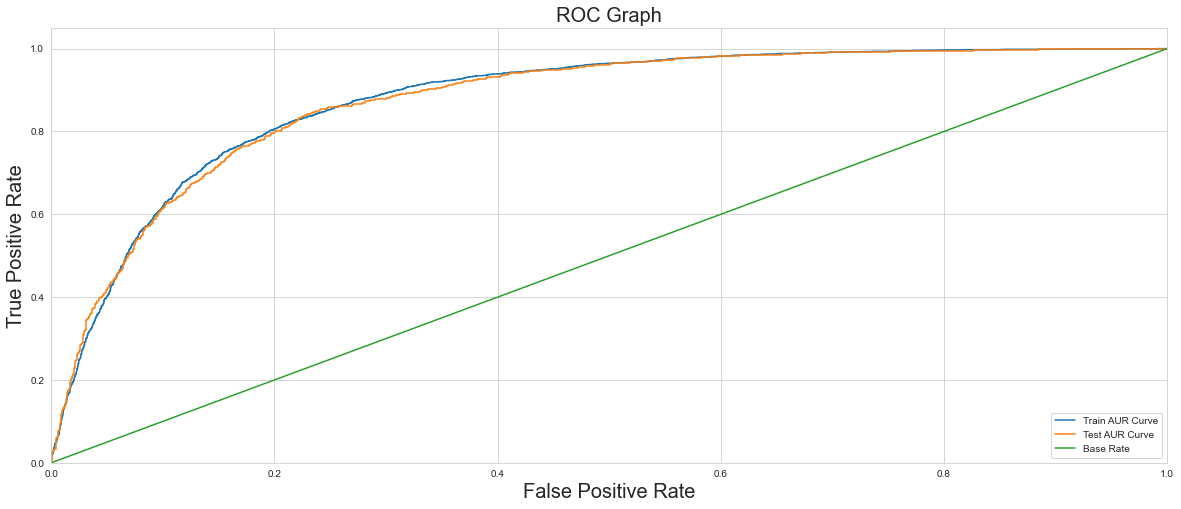

In [73]:
from sklearn.metrics import roc_curve
FPR_lr_train, TPR_lr_train, Thresholds_train = roc_curve(y_train, log_grid.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_lr_train)
tpr_series = pd.Series(TPR_lr_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_lr_test, TPR_lr_test, Thresholds_test = roc_curve(y_test, log_grid.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_lr_test)
tpr_series = pd.Series(TPR_lr_test)
thresholds_series = pd.Series(Thresholds_test)

sns.set_style("whitegrid")
plt.figure(figsize = (20,8))
plt.plot(FPR_lr_train, TPR_lr_train, label = 'Train AUR Curve')
plt.plot(FPR_lr_test, TPR_lr_test,   label = 'Test AUR Curve')

# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")
plt.show()

In [74]:
import sklearn
print('Roc Auc Score for Train Data is :', sklearn.metrics.roc_auc_score(y_train, train_log_pred))
print('Roc Auc Score for Test Data is  :', sklearn.metrics.roc_auc_score(y_test, test_log_pred))

Roc Auc Score for Train Data is : 0.80183798628591
Roc Auc Score for Test Data is  : 0.7983459991698204


### 2. Decision Tree Classifier

In [75]:
params = {
    'criterion': ["gini", "entropy"],
    "max_depth" : [*range(3,10,2), None], 
    "min_samples_leaf": list(range(1,10,2)), 
    "max_features": [*range(3,10,2), None], 
    "max_leaf_nodes": [None, 10, 20, 30, 40, 50] 
}

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2, 
                           scoring = "accuracy")

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'max_features': [3, 5, 7, 9, None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 3, 5, 7, 9]},
             scoring='accuracy', verbose=2)

In [76]:
print("Best parameters for the model :", grid_search.best_params_)
print("Best score for the model      :", grid_search.best_score_)

Best parameters for the model : {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'max_leaf_nodes': 50, 'min_samples_leaf': 1}
Best score for the model      : 0.8245228364311386


In [77]:
y_pred_dtcgcv_train = grid_search.predict(x_train)
y_pred_dtcgcv_test  = grid_search.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_dtcgcv_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_dtcgcv_test, y_test))

Training accuracy : 0.8354025342378087
Testing accuracy  : 0.8097939683487608


In [78]:
cm_test = confusion_matrix(y_test, y_pred_dtcgcv_test)
print(cm_test)

[[1403  339]
 [ 298 1309]]


In [79]:
print('Classification report for train data is : \n',
      classification_report(y_train, y_pred_dtcgcv_train))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred_dtcgcv_test))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      4131
           1       0.81      0.84      0.83      3682

    accuracy                           0.84      7813
   macro avg       0.83      0.84      0.84      7813
weighted avg       0.84      0.84      0.84      7813



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1742
           1       0.79      0.81      0.80      1607

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



In [80]:
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, y_pred_dtcgcv_train))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_dtcgcv_train))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_dtcgcv_train)))

print('\n')
print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_dtcgcv_test))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred_dtcgcv_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtcgcv_test)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.16459746576219123
Mean Absolute Error           : 0.16459746576219123
Root mean Square Error (RMSE) : 0.40570613227087315


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.19020603165123917
Mean Absolute Error           : 0.19020603165123917
Root mean Square Error (RMSE) : 0.4361261648321953


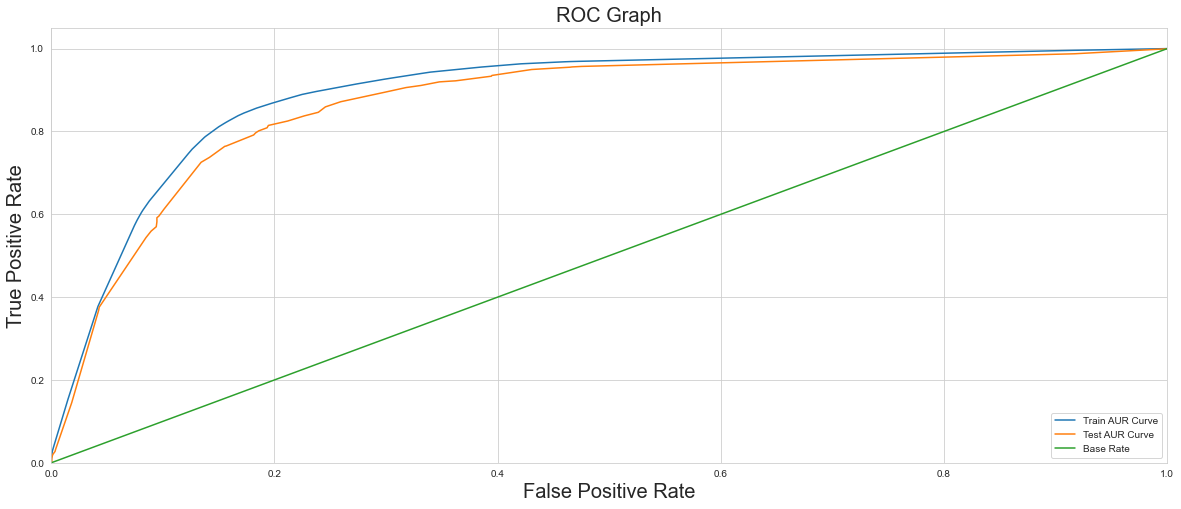

In [81]:
FPR_dtc_train, TPR_dtc_train, Thresholds_train = roc_curve(y_train, grid_search.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_dtc_train)
tpr_series = pd.Series(TPR_dtc_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_dtc_test, TPR_dtc_test, Thresholds_test = roc_curve(y_test, grid_search.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_dtc_test)
tpr_series = pd.Series(TPR_dtc_test)
thresholds_series = pd.Series(Thresholds_test)

sns.set_style("whitegrid")
plt.figure(figsize = (20,8))
plt.plot(FPR_dtc_train, TPR_dtc_train, label = 'Train AUR Curve')
plt.plot(FPR_dtc_test, TPR_dtc_test,   label = 'Test AUR Curve')

# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")
plt.show()

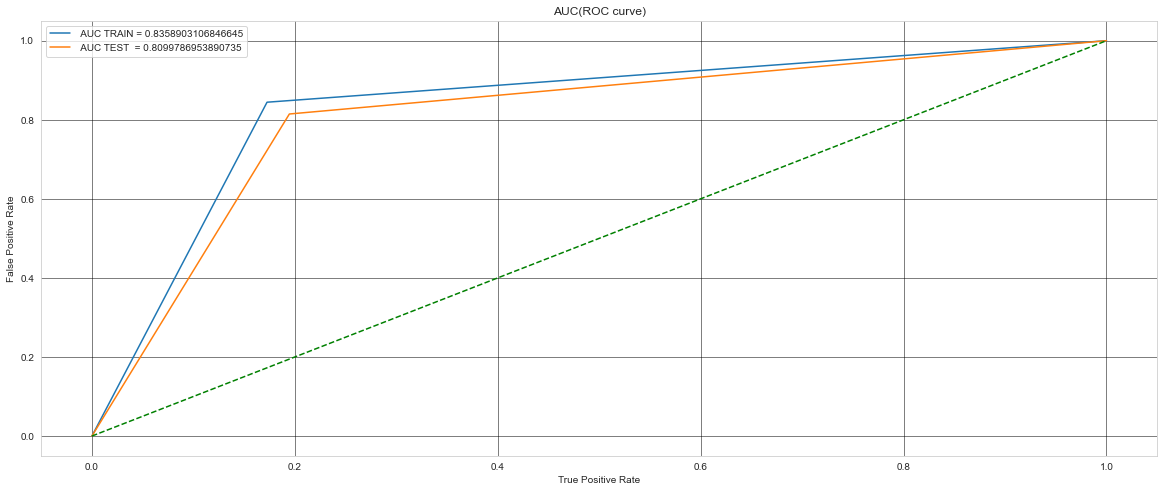

In [82]:
FPR_dtc_train, TPR_dtc_train, Thresholds_train = roc_curve(y_train, y_pred_dtcgcv_train)
FPR_dtc_test, TPR_dtc_test, Thresholds_test    = roc_curve(y_test, y_pred_dtcgcv_test)
from sklearn.metrics import auc
plt.figure(figsize = (20,8))
plt.grid()
plt.plot(FPR_dtc_train, TPR_dtc_train, label = " AUC TRAIN = "+str(auc(FPR_dtc_train, TPR_dtc_train)))
plt.plot(FPR_dtc_test, TPR_dtc_test,   label = " AUC TEST  = "+str(auc(FPR_dtc_test, TPR_dtc_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.show()

In [83]:
import sklearn
print('Roc Auc Score for Train Data is :', sklearn.metrics.roc_auc_score(y_train, y_pred_dtcgcv_train))
print('Roc Auc Score for Test Data is  :', sklearn.metrics.roc_auc_score(y_test, y_pred_dtcgcv_test))

Roc Auc Score for Train Data is : 0.8358903106846645
Roc Auc Score for Test Data is  : 0.8099786953890735


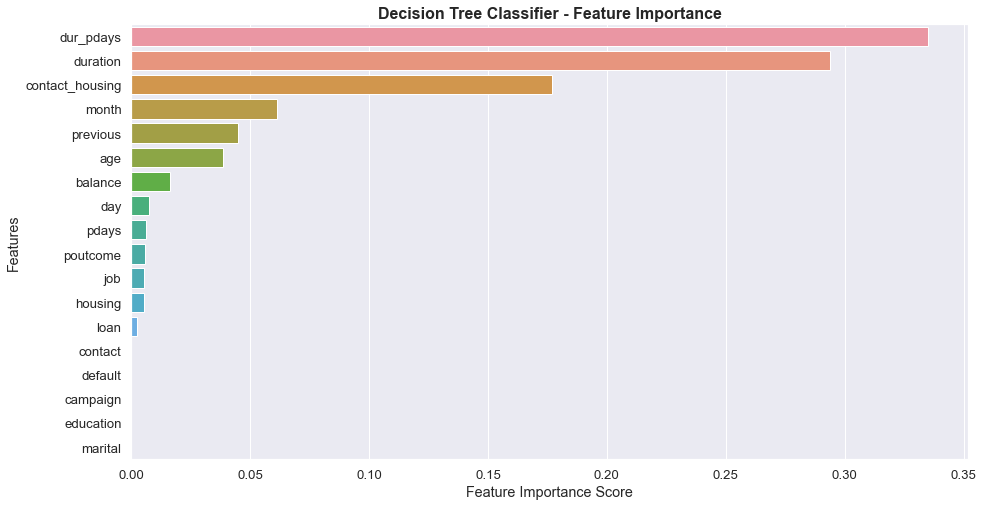

In [84]:
importance = grid_search.best_estimator_.feature_importances_
feature_imp = pd.Series(importance, index = X.columns).sort_values(ascending = False)
feature_imp
sns.set(style = 'darkgrid', font_scale = 1.2)
plt.figure(figsize = (15, 8))
# Visualize the Importance Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Decision Tree Classifier - Feature Importance', weight = 'bold', fontsize = 16)
plt.show()

### 3. Random Forest Classifier

In [85]:
params = {
    'n_estimators':[100, 200, 300, 400, 500], 
    'max_depth': [*range(3,10,2), None], 
    'min_samples_leaf': list(range(1,10,2)), 
    'criterion': ["gini", "entropy"] 
}

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = RandomForestClassifier(random_state = 42)
grid_search_rf = GridSearchCV(estimator = model, 
                              param_grid = params, 
                              cv = 5, 
                              n_jobs = -1, 
                              verbose = 1, 
                              scoring = "accuracy")

grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=1)

In [86]:
print("Best parameters for the model :", grid_search_rf.best_params_)
print("Best score for the model      :", grid_search_rf.best_score_)

Best parameters for the model : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 400}
Best score for the model      : 0.8450029204482992


In [87]:
train_rfc_pred = grid_search_rf.predict(x_train)
test_rfc_pred  = grid_search_rf.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_train, train_rfc_pred))
print("Test Accuracy  : ", accuracy_score(y_test, test_rfc_pred))

Train Accuracy :  1.0
Test Accuracy  :  0.8369662585846521


In [88]:
cm_test = confusion_matrix(y_test, test_rfc_pred)
print(cm_test)

[[1415  327]
 [ 219 1388]]


In [89]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_rfc_pred))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, test_rfc_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4131
           1       1.00      1.00      1.00      3682

    accuracy                           1.00      7813
   macro avg       1.00      1.00      1.00      7813
weighted avg       1.00      1.00      1.00      7813



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1742
           1       0.81      0.86      0.84      1607

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



In [90]:
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, train_rfc_pred))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, train_rfc_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, train_rfc_pred)))

print('\n')
print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, test_rfc_pred))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, test_rfc_pred))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, test_rfc_pred)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.0
Mean Absolute Error           : 0.0
Root mean Square Error (RMSE) : 0.0


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.16303374141534788
Mean Absolute Error           : 0.16303374141534788
Root mean Square Error (RMSE) : 0.40377436943836326


In [91]:
print('Roc Auc Score for Train Data is :', sklearn.metrics.roc_auc_score(y_train, train_rfc_pred))
print('Roc Auc Score for Test Data is  :', sklearn.metrics.roc_auc_score(y_test, test_rfc_pred))

Roc Auc Score for Train Data is : 1.0
Roc Auc Score for Test Data is  : 0.8380029749295741


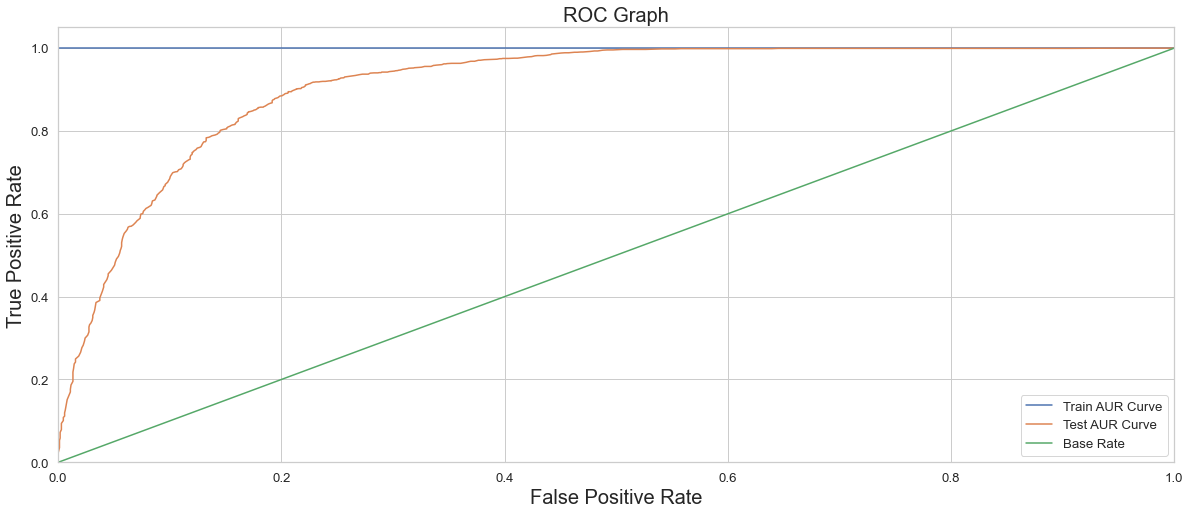

In [92]:
FPR_dtc_train, TPR_dtc_train, Thresholds_train = roc_curve(y_train, grid_search_rf.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_dtc_train)
tpr_series = pd.Series(TPR_dtc_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_dtc_test, TPR_dtc_test, Thresholds_test = roc_curve(y_test, grid_search_rf.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_dtc_test)
tpr_series = pd.Series(TPR_dtc_test)
thresholds_series = pd.Series(Thresholds_test)

sns.set_style("whitegrid")
plt.figure(figsize = (20,8))
plt.plot(FPR_dtc_train, TPR_dtc_train, label = 'Train AUR Curve')
plt.plot(FPR_dtc_test, TPR_dtc_test,   label = 'Test AUR Curve')

# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")
plt.show()

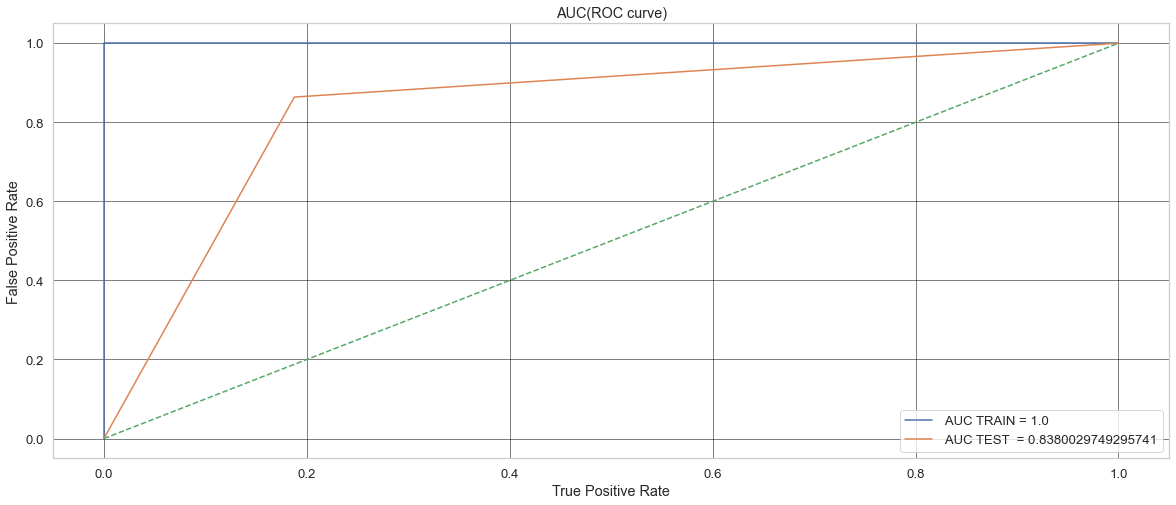

In [93]:
FPR_dtc_train, TPR_dtc_train, Thresholds_train = roc_curve(y_train, train_rfc_pred)
FPR_dtc_test, TPR_dtc_test, Thresholds_test    = roc_curve(y_test, test_rfc_pred)
from sklearn.metrics import auc
plt.figure(figsize = (20,8))
plt.grid()
plt.plot(FPR_dtc_train, TPR_dtc_train, label = " AUC TRAIN = "+str(auc(FPR_dtc_train, TPR_dtc_train)))
plt.plot(FPR_dtc_test, TPR_dtc_test,   label = " AUC TEST  = "+str(auc(FPR_dtc_test, TPR_dtc_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.show()

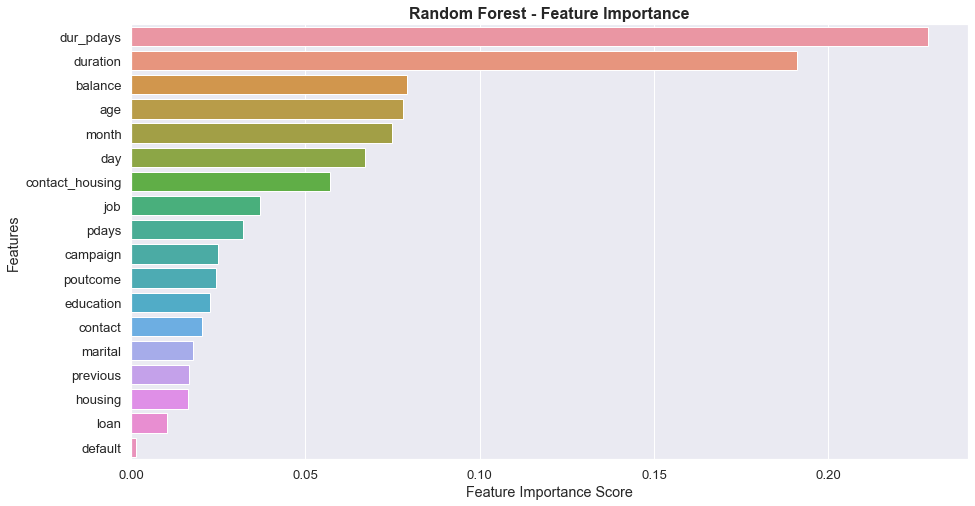

In [94]:
importance = grid_search_rf.best_estimator_.feature_importances_
feature_imp = pd.Series(importance, index = X.columns).sort_values(ascending = False)
feature_imp
sns.set(style = 'darkgrid', font_scale = 1.2)
plt.figure(figsize = (15, 8))
# Visualize the Importance Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest - Feature Importance', weight = 'bold', fontsize = 16)
plt.show()

### 4. SVC

In [95]:
model = SVC()
param = {'C': [0.01, 0.001, 0.0001, 0.1, 0.8, 0.9, 1], 
         'kernel':['linear', 'rbf'], 
         'gamma' :[0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4] 
        }

grid_svc = GridSearchCV(model, 
                        param_grid = param, 
                        scoring = 'accuracy', 
                        cv = 5)

grid_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.001, 0.0001, 0.1, 0.8, 0.9, 1],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [96]:
print("Best parameters for the model :", grid_svc.best_params_)
print("Best score for the model      :", grid_svc.best_score_)

Best parameters for the model : {'C': 1, 'gamma': 1.4, 'kernel': 'rbf'}
Best score for the model      : 0.818507695975188


In [97]:
y_pred_svc_train = grid_svc.predict(x_train)
y_pred_svc_test  = grid_svc.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_train, y_pred_svc_train))
print("Test Accuracy  : ", accuracy_score(y_test, y_pred_svc_test))

Train Accuracy :  0.8627927812619992
Test Accuracy  :  0.8127799343087488


In [98]:
cm_test = confusion_matrix(y_test, y_pred_svc_test)
print(cm_test)

[[1390  352]
 [ 275 1332]]


In [99]:
print('Classification report for train data is : \n',
      classification_report(y_train, y_pred_svc_train))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred_svc_test))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      4131
           1       0.83      0.89      0.86      3682

    accuracy                           0.86      7813
   macro avg       0.86      0.86      0.86      7813
weighted avg       0.87      0.86      0.86      7813



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1742
           1       0.79      0.83      0.81      1607

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



In [100]:
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, y_pred_svc_train))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_svc_train))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_svc_train)))

print('\n')
print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_svc_test))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred_svc_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svc_test)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.13720721873800076
Mean Absolute Error           : 0.13720721873800076
Root mean Square Error (RMSE) : 0.37041492780124396


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.18722006569125113
Mean Absolute Error           : 0.18722006569125113
Root mean Square Error (RMSE) : 0.43268934085698385


In [101]:
import sklearn
print('Roc Auc Score for Train Data is :', sklearn.metrics.roc_auc_score(y_train, y_pred_svc_train))
print('Roc Auc Score for Test Data is  :', sklearn.metrics.roc_auc_score(y_test, y_pred_svc_test))

Roc Auc Score for Train Data is : 0.86430117744887
Roc Auc Score for Test Data is  : 0.8134035437669725


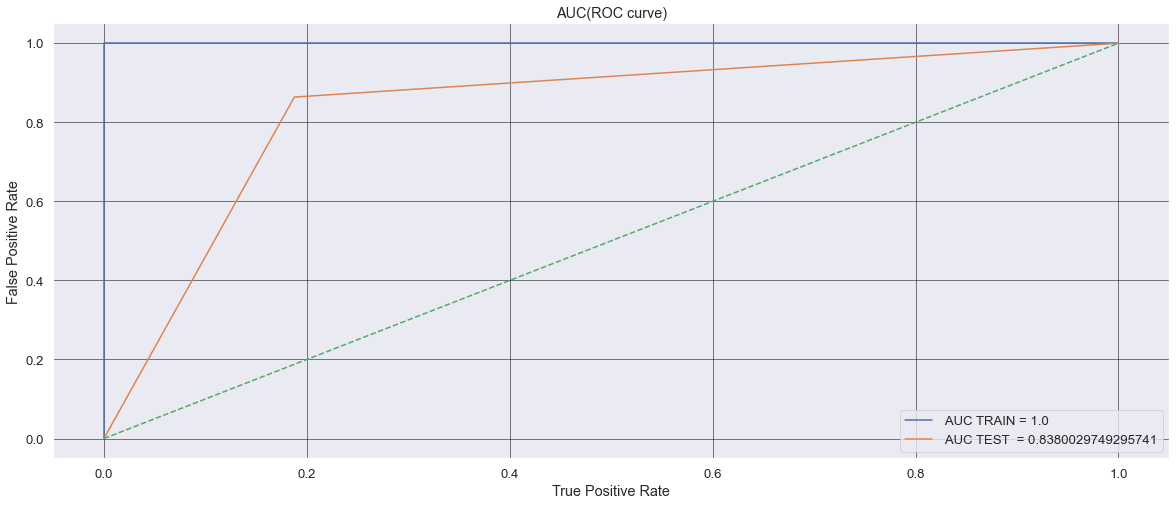

In [102]:
FPR_svc_train, TPR_svc_train, Thresholds_train = roc_curve(y_train, train_rfc_pred)
FPR_svc_test, TPR_svc_test, Thresholds_test    = roc_curve(y_test, test_rfc_pred)
from sklearn.metrics import auc
plt.figure(figsize = (20,8))
plt.grid()
plt.plot(FPR_svc_train, TPR_svc_train, label = " AUC TRAIN = "+str(auc(FPR_svc_train, TPR_svc_train)))
plt.plot(FPR_svc_test, TPR_svc_test,   label = " AUC TEST  = "+str(auc(FPR_svc_test, TPR_svc_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.show()

### 5. XGB Classifier

In [103]:
xgb = XGBClassifier(learning_rate = 0.1, 
                    n_estimators = 400, 
                    max_depth = 5, 
                    min_child_weight = 1, 
                    gamma = 0, 
                    subsample = 0.8, 
                    colsample_bytree = 0.8, 
                    objective = 'binary:logistic', 
                    nthread = 4, 
                    scale_pos_weight = 1, 
                    seed = 27)

xgb.fit(x_train, y_train)

[16:48:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [104]:
y_pred_xgb_train = xgb.predict(x_train)
y_pred_xgb_test  = xgb.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_xgb_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_xgb_test, y_test))

Train Accuracy :  0.9624984001023934
Test Accuracy  :  0.8507017020005972


In [105]:
cm_test = confusion_matrix(y_test, y_pred_xgb_test)
print(cm_test)

[[1455  287]
 [ 213 1394]]


In [106]:
print('Classification report for train data is : \n',
      classification_report(y_train, y_pred_xgb_train))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred_xgb_test))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      4131
           1       0.95      0.97      0.96      3682

    accuracy                           0.96      7813
   macro avg       0.96      0.96      0.96      7813
weighted avg       0.96      0.96      0.96      7813



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1742
           1       0.83      0.87      0.85      1607

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [107]:
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, y_pred_xgb_train))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_xgb_train))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_xgb_train)))

print('\n')
print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_xgb_test))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred_xgb_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_test)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.037501599897606555
Mean Absolute Error           : 0.037501599897606555
Root mean Square Error (RMSE) : 0.1936532981841687


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.1492982979994028
Mean Absolute Error           : 0.1492982979994028
Root mean Square Error (RMSE) : 0.386391379302648


In [108]:
import sklearn
print('Roc Auc Score for Train Data is :', sklearn.metrics.roc_auc_score(y_train, y_pred_xgb_train))
print('Roc Auc Score for Test Data is  :', sklearn.metrics.roc_auc_score(y_test, y_pred_xgb_test))

Roc Auc Score for Train Data is : 0.962912865470086
Roc Auc Score for Test Data is  : 0.8513508637940926


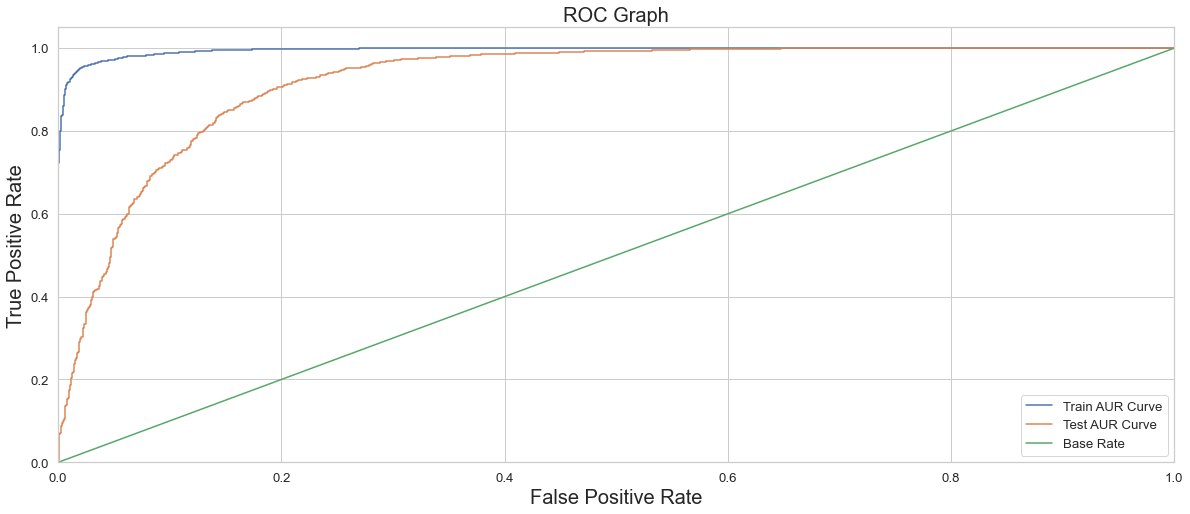

In [109]:
from sklearn.metrics import roc_curve
FPR_gbm_train, TPR_gbm_train, Thresholds_train = roc_curve(y_train, xgb.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_gbm_train)
tpr_series = pd.Series(TPR_gbm_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_gbm_test, TPR_gbm_test, Thresholds_test = roc_curve(y_test, xgb.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_gbm_test)
tpr_series = pd.Series(TPR_gbm_test)
thresholds_series = pd.Series(Thresholds_test)

from sklearn.metrics import roc_curve

sns.set_style("whitegrid")
plt.figure(figsize = (20,8))

plt.plot(FPR_gbm_train, TPR_gbm_train, label = 'Train AUR Curve')
plt.plot(FPR_gbm_test, TPR_gbm_test,   label = 'Test AUR Curve')


# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")
plt.show()

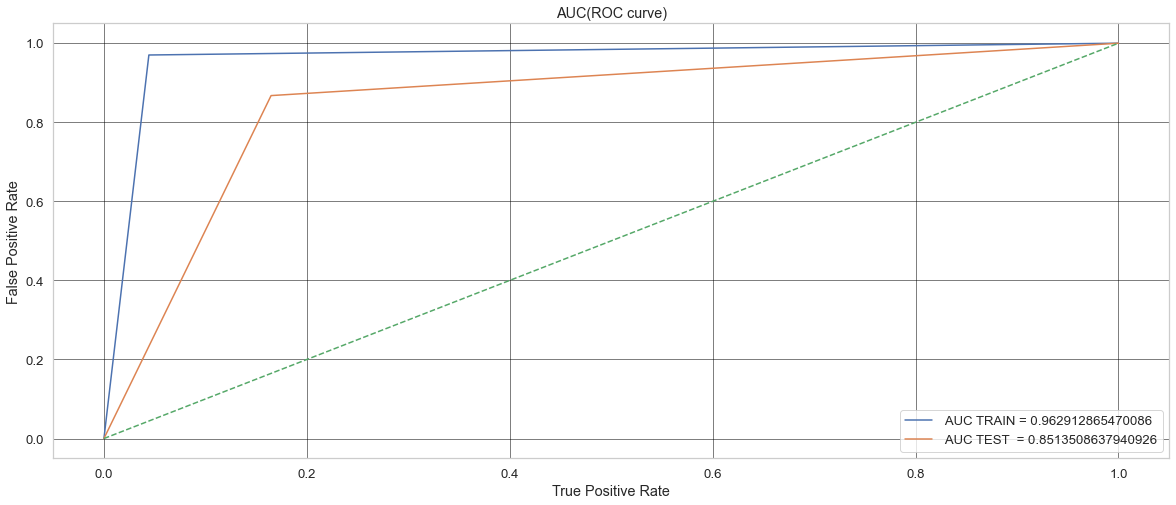

In [110]:
FPR_gbm_train, TPR_gbm_train, Thresholds_train = roc_curve(y_train, y_pred_xgb_train)
FPR_gbm_test, TPR_gbm_test, Thresholds_test    = roc_curve(y_test, y_pred_xgb_test)
from sklearn.metrics import auc
plt.figure(figsize = (20,8))
plt.grid()
plt.plot(FPR_gbm_train, TPR_gbm_train, label = " AUC TRAIN = "+str(auc(FPR_gbm_train, TPR_gbm_train)))
plt.plot(FPR_gbm_test, TPR_gbm_test,   label = " AUC TEST  = "+str(auc(FPR_gbm_test, TPR_gbm_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.show()

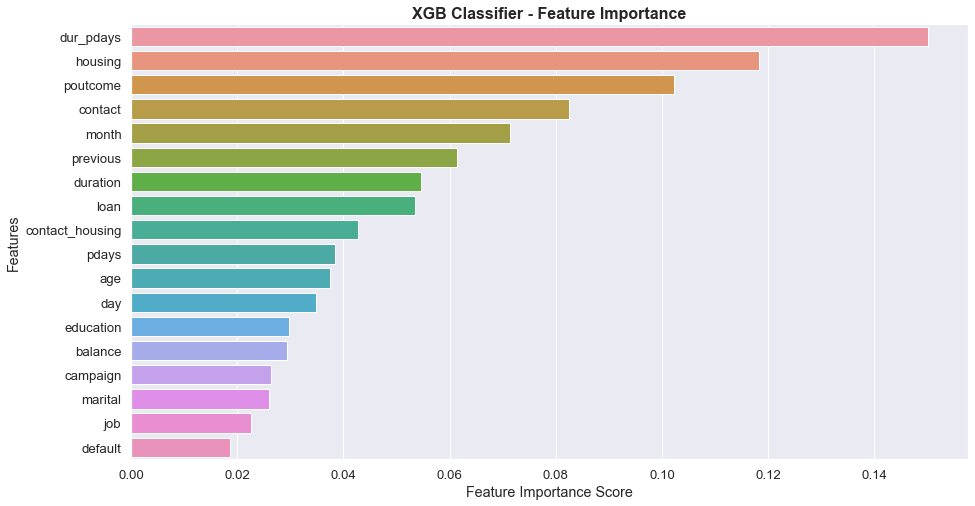

In [111]:
importance = xgb.feature_importances_
feature_imp = pd.Series(importance, index = X.columns).sort_values(ascending = False)
feature_imp
sns.set(style = 'darkgrid', font_scale = 1.2)
plt.figure(figsize = (15, 8))
# Visualize the Importance Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('XGB Classifier - Feature Importance', weight = 'bold', fontsize = 16)
plt.show()